## 8. 신경망 · 딥러닝의 응용
### Training a neural network on MNIST

| On this notebook
| 

In [1]:
# 리스트 8-1
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

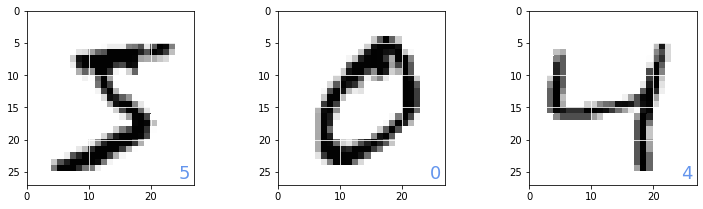

In [2]:
# 리스트 8-1-2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12,3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1,3,id+1)
    img = x_train[id, :, :]
    plt.pcolor(255-img)
    plt.text(24.5, 26, "%d" % y_train[id],
            color='cornflowerblue', fontsize=18)
    plt.xlim(0,27)
    plt.ylim(27,0)
    plt.grid('on', color='white')
plt.show()

In [3]:
# 리스트 8-1-3
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784) #(A)
x_train = x_train.astype('float32') #(B)
x_train = x_train / 255 #(C)

num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes) #(D)
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [8]:
# use different optimizer : SGD

np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential() # (A)
model.add( Dense(16, input_dim=784, activation='sigmoid') ) #(B)
model.add( Dense(10, activation='softmax') ) #(C)
model.compile(loss='categorical_crossentropy',
              optimizer='SGD', # 수정 부분
              metrics=['accuracy']) #(D)

In [9]:
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                   verbose=1, validation_data=(x_test, y_test)) # (A)
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
60/60 [==============================] - 1s 6ms/step - loss: 2.3617 - accuracy: 0.1260 - val_loss: 2.3157 - val_accuracy: 0.1435
Epoch 2/10
60/60 [==============================] - 0s 4ms/step - loss: 2.2888 - accuracy: 0.1768 - val_loss: 2.2535 - val_accuracy: 0.2158
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 2.2343 - accuracy: 0.2638 - val_loss: 2.2041 - val_accuracy: 0.3162
Epoch 4/10
60/60 [==============================] - 0s 4ms/step - loss: 2.1893 - accuracy: 0.3456 - val_loss: 2.1615 - val_accuracy: 0.3895
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 2.1495 - accuracy: 0.4139 - val_loss: 2.1227 - val_accuracy: 0.4505
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 2.1124 - accuracy: 0.4662 - val_loss: 2.0860 - val_accuracy: 0.4995
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 2.0770 - accuracy: 0.5063 - val_loss: 2.0506 - val_accuracy: 0.5324
Epoch 8/10
60/60 [==

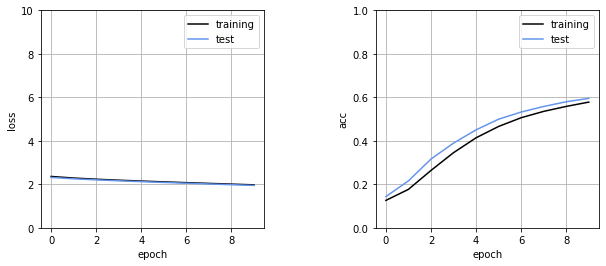

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10,4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

In [16]:
# 리스트 8-1-(4)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential() # (A)
model.add( Dense(16, input_dim=784, activation='sigmoid') ) #(B)
model.add( Dense(10, activation='softmax') ) #(C)
model.compile(loss='categorical_crossentropy',
              optimizer='adam', # 수정 부분
              metrics=['accuracy']) #(D)

In [19]:
# 리스트 8-1-(5)

import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                   verbose=1, validation_data=(x_test, y_test)) # (A)
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
60/60 [==============================] - 0s 4ms/step - loss: 0.3322 - accuracy: 0.9178 - val_loss: 0.3222 - val_accuracy: 0.9197
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3232 - accuracy: 0.9192 - val_loss: 0.3138 - val_accuracy: 0.9213
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.9208 - val_loss: 0.3069 - val_accuracy: 0.9220
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3073 - accuracy: 0.9219 - val_loss: 0.3001 - val_accuracy: 0.9223
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.9232 - val_loss: 0.2933 - val_accuracy: 0.9225
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.2936 - accuracy: 0.9241 - val_loss: 0.2880 - val_accuracy: 0.9243
Epoch 7/10
60/60 [==============================] - 0s 4ms/step - loss: 0.2879 - accuracy: 0.9253 - val_loss: 0.2826 - val_accuracy: 0.9245
Epoch 8/10
60/60 [==

In [21]:
print('Computation time: {0:.3f} sec'.format(time.time()- startTime))

Computation time: 550.112 sec


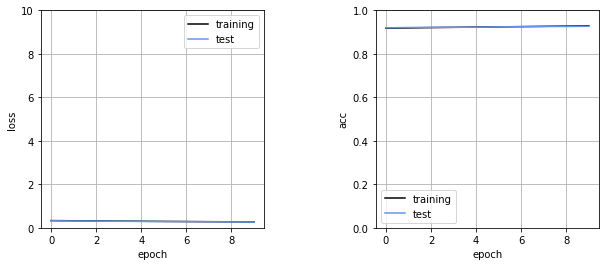

In [24]:
# 리스트 8-1-(6)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(10,4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'], label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

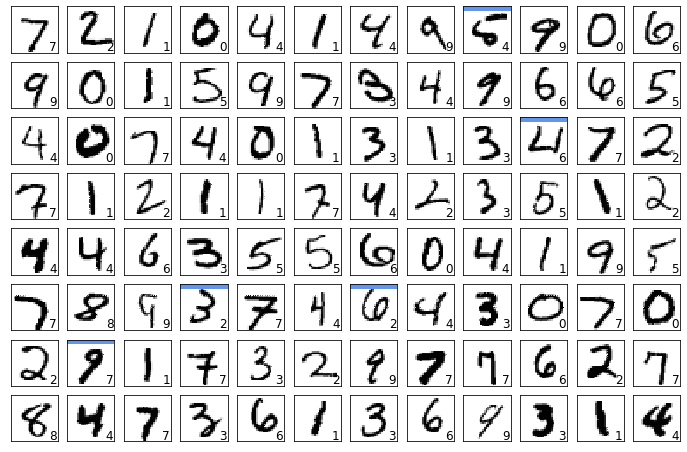

In [25]:
# 리스트 8-1-(7)

def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.figure(2, figsize=(12, 8))
    plt.gray()

    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot( [0,27], [1,1], color='cornflowerblue', linewidth=5 )
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

# 메인 
show_prediction()
plt.show()

In [27]:
# 리스트 8-1-(1)
np.random.seed(1)

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add( Dense(16, input_dim=784, activation='relu') ) #(A)
model.add( Dense(10, activation='softmax') )
model.compile(loss='categorical_crossentropy',
              optimizer='adam', # 수정 부분
              metrics=['accuracy']) #(D)

startTime = time.time()

history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                   verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
60/60 [==============================] - 1s 5ms/step - loss: 1.6510 - accuracy: 0.5230 - val_loss: 1.0362 - val_accuracy: 0.7737
Epoch 2/10
60/60 [==============================] - 0s 3ms/step - loss: 0.7517 - accuracy: 0.8308 - val_loss: 0.5163 - val_accuracy: 0.8748
Epoch 3/10
60/60 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.8780 - val_loss: 0.3904 - val_accuracy: 0.9003
Epoch 4/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3794 - accuracy: 0.8985 - val_loss: 0.3365 - val_accuracy: 0.9112
Epoch 5/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3337 - accuracy: 0.9089 - val_loss: 0.3072 - val_accuracy: 0.9167
Epoch 6/10
60/60 [==============================] - 0s 3ms/step - loss: 0.3053 - accuracy: 0.9164 - val_loss: 0.2855 - val_accuracy: 0.9203
Epoch 7/10
60/60 [==============================] - 0s 3ms/step - loss: 0.2851 - accuracy: 0.9213 - val_loss: 0.2718 - val_accuracy: 0.9243
Epoch 8/10
60/60 [==

In [28]:
print('Computation time: {0:.3f} sec'.format(time.time()- startTime))

Computation time: 45.538 sec


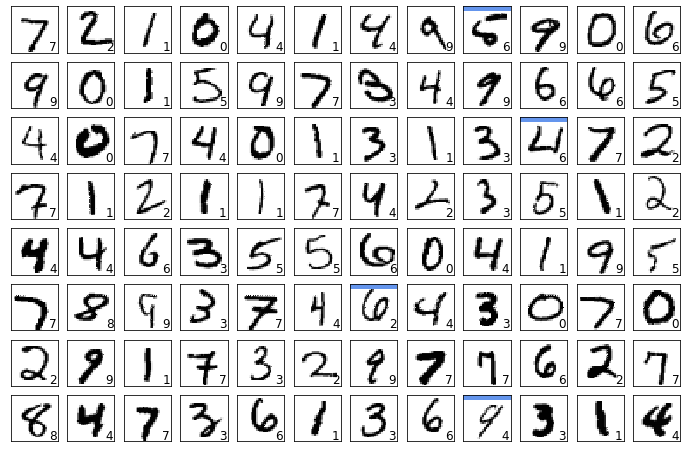

In [29]:
# 리스트 8-1-(9)
show_prediction()
plt.show()

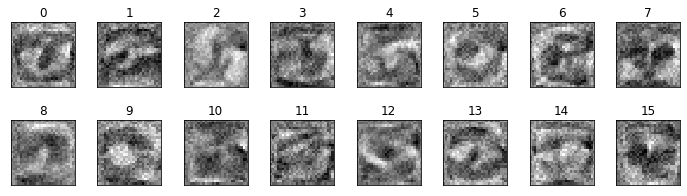

In [32]:
# 리스트 8-1-(10)
# 1층째의 가중치 시각화

w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)

for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

- ReLU 네트워크가 학습 후 획득한 입력부터 중간층 뉴런까지의 가중치
- 검은 부분이 양의 값을, 흰색 부분이 음의 값을 나타낸다.
- 검은 부분에 입력 이미지가 있으면 그 유닛은 활성화하고,
- 반대로 흰색 부분에 입력 이밎가 있는 유닛은 억제된다.

In [35]:
# 리스트 8-2-(1)
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

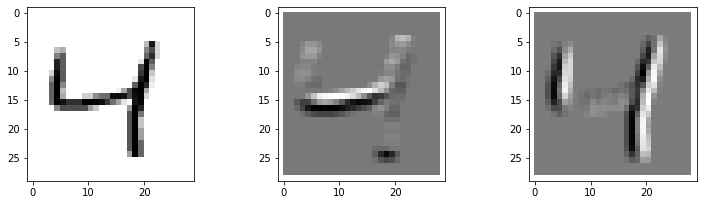

In [37]:
# 리스트 8-2-(2)
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myfil1 = np.array([[1,1,1], [1,1,1], [-2,-2,-2]], dtype=float) #(A)
myfil2 = np.array([[-2,1,1], [-2,1,1], [-2,1,1]], dtype=float) #(B)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

#필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))

# 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1,3,1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1,3,2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)

plt.subplot(1,3,3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

- 원래 이미지는 흰색과 검정색으로 이루어져 있다.
- 가로 라인의 아래쪽이 큰 값이 된다.
    - 흰색: 작은 값
    - 검정색: 큰 값
- 세로 라인의 왼쪽이 큰 값을 갖는다.
    - 흰색: 작은 값
    - 검정색: 큰 값

- 가로와 세로의 엣지를 강조하는 필터를 시험했지만, 필터의 수치를 바구는 것으로 대각선 엣지 강조, 이미지 스무딩, 세부 부분의 강조 등 다양한 처리 가능
- 위 그림은 모든 요소를 합하면 0이 되도록 디자인 되어 있음
- 공간 구조가 없는 균일한 부분은 0으로 변환
- 필터에서 추출하려는 구조가 존재할 경우엔 0 이상의 값으로 변환되어, 0을 감지 레벨의 기준으로 세울 수 있음
- 필터를 적용하면 출력 이미지의 크기는 작아짐
- 여녹으로 다양한 필터를 적용하면 이미지가 점점 작아져버려서 `패딩(padding)`이라는 방법 사용

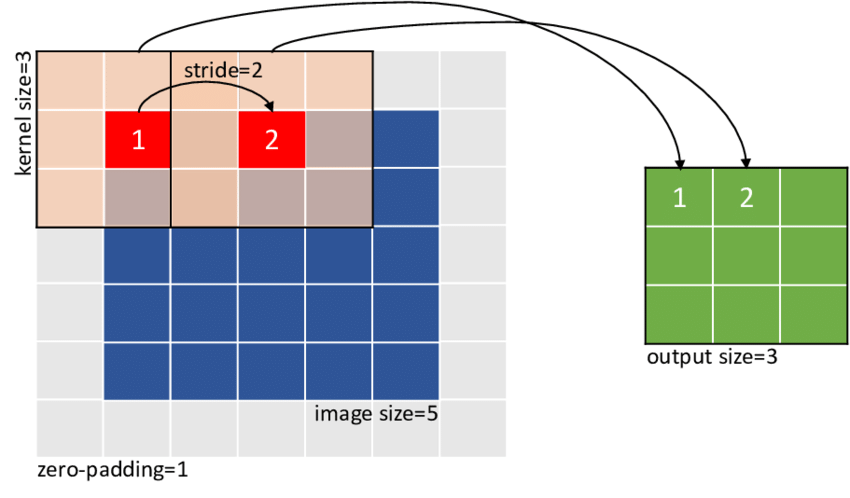

<br/>

### 패딩(padding), 스트라이드(stride)

- 필터 연산을 하면 출력 이미지는 원래 크기보다 작아짐
- 원본 이미지의 주위에 0의 요소를 덧붙이면, 이미지의 크기는 변하지 않음
- `패딩`은 필터를 적용하기 전에 0 등의 고정된 요소로 주위를 부풀리는 방법
- `스트라이드`는 필터를 이동시키는 간격을 의미함
    - 스트라이드를 크게 하면 출력 이미지가 작아짐
- `패딩`과 `스트라이드`는 라이브러리로 합성곱 네트워크를 사용할 때 인수로 사용

In [38]:
# 리스트 8-2-(3)

np.random.seed(1)

import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import time

model = Sequential()
model.add(Conv2D(8, (3,3), padding='same', # 출력 크기가 변하지 않도록 패딩 추가 처리
                 input_shape=(28,28,1),
                 activation='relu')) #(A)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, 
                    batch_size=1000,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 3s 50ms/step - loss: 0.7853 - accuracy: 0.8112 - val_loss: 0.3501 - val_accuracy: 0.9011
Epoch 2/20
60/60 [==============================] - 3s 50ms/step - loss: 0.3212 - accuracy: 0.9077 - val_loss: 0.2765 - val_accuracy: 0.9206
Epoch 3/20
60/60 [==============================] - 3s 53ms/step - loss: 0.2673 - accuracy: 0.9240 - val_loss: 0.2393 - val_accuracy: 0.9301
Epoch 4/20
60/60 [==============================] - 3s 53ms/step - loss: 0.2305 - accuracy: 0.9349 - val_loss: 0.2094 - val_accuracy: 0.9414
Epoch 5/20
60/60 [==============================] - 3s 52ms/step - loss: 0.2004 - accuracy: 0.9437 - val_loss: 0.1813 - val_accuracy: 0.9485
Epoch 6/20
60/60 [==============================] - 3s 51ms/step - loss: 0.1723 - accuracy: 0.9520 - val_loss: 0.1578 - val_accuracy: 0.9563
Epoch 7/20
60/60 [==============================] - 3s 51ms/step - loss: 0.1502 - accuracy: 0.9588 - val_loss: 0.1413 - val_accuracy: 0.9622
Epoch 8/20
60

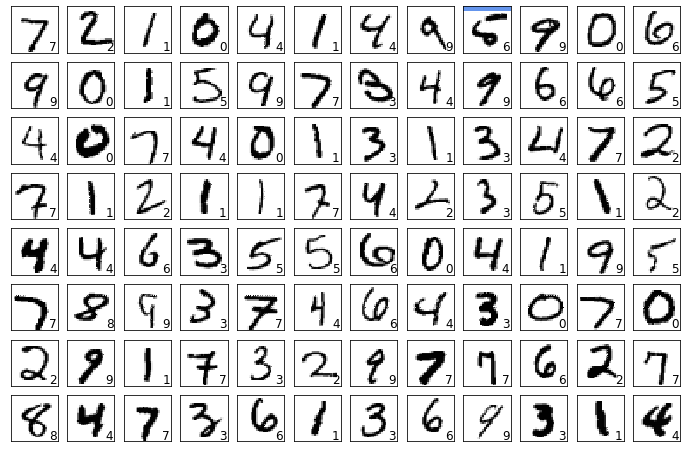

In [39]:
# 리스트 8-2-(4)
show_prediction()
plt.show()

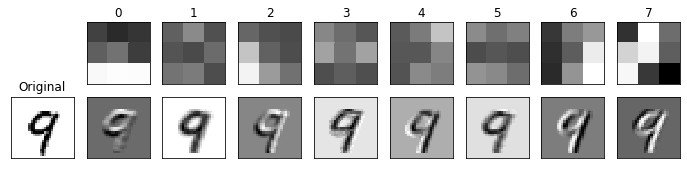

In [42]:
# 리스트 8-2-(5)
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2,9,10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28

x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")

w = model.layers[0].get_weights()[0] #(A)
max_w = np.max(w)
min_w = np.min(w)

for i in range(8):
  plt.subplot(2, 9, i + 2)
  w1 = w[:, :, 0, i]
  w1 = w1.reshape(3,3)
  plt.pcolor(-w1, vmin=min_w, vmax=max_w)
  plt.xlim(0,3)
  plt.ylim(3,0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
  plt.subplot(2,9,i + 11)
  out_img = np.zeros_like(x_img)
  
  #필터 처리
  for ih in range(img_h - 3):
    for iw in range(img_w - 3):
      img_part = x_img[ih:ih + 3, iw:iw + 3]
      out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
  plt.pcolor(-out_img)
  plt.xlim(0, img_w)
  plt.ylim(img_h, 0)
  plt.xticks([], "")
  plt.yticks([], "")
plt.show()

In [43]:
# 리스트 8-2-(6)
np.random.seed(1)

import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import time

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) #(A)
model.add(Conv2D(64, (3,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2))) #(B)
model.add(Dropout(0.25)) #(C)

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) #(D)
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train,
                    batch_size=1000, 
                    epochs=20, 
                    verbose=1, 
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print("test loss:", score[0])
print("test accu:", score[1])

print("computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 22s 354ms/step - loss: 0.6717 - accuracy: 0.7973 - val_loss: 0.1399 - val_accuracy: 0.9590
Epoch 2/20
60/60 [==============================] - 21s 352ms/step - loss: 0.1466 - accuracy: 0.9559 - val_loss: 0.0682 - val_accuracy: 0.9786
Epoch 3/20
60/60 [==============================] - 22s 369ms/step - loss: 0.0948 - accuracy: 0.9718 - val_loss: 0.0489 - val_accuracy: 0.9844
Epoch 4/20
60/60 [==============================] - 21s 353ms/step - loss: 0.0749 - accuracy: 0.9771 - val_loss: 0.0410 - val_accuracy: 0.9856
Epoch 5/20
60/60 [==============================] - 21s 354ms/step - loss: 0.0593 - accuracy: 0.9822 - val_loss: 0.0335 - val_accuracy: 0.9892
Epoch 6/20
60/60 [==============================] - 21s 353ms/step - loss: 0.0516 - accuracy: 0.9842 - val_loss: 0.0288 - val_accuracy: 0.9904
Epoch 7/20
60/60 [==============================] - 22s 361ms/step - loss: 0.0476 - accuracy: 0.9848 - val_loss: 0.0268 - val_accuracy: 0.9919

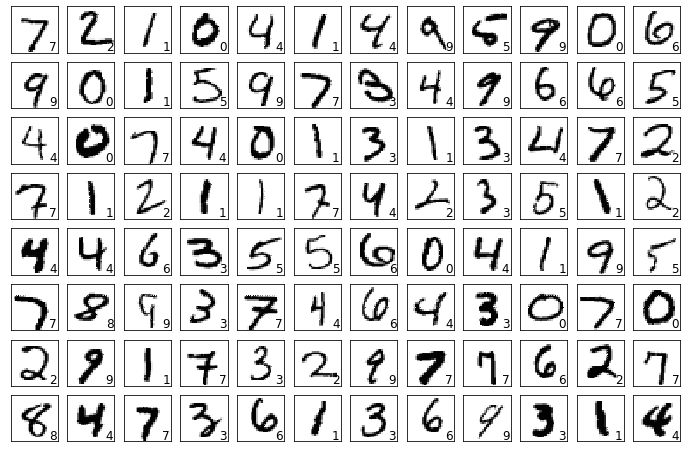

In [44]:
# 리스트 8-2-(7)
show_prediction()
plt.show()